ML project
Group 7

In [2]:
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import sklearn
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datafiniti_Hotel_Reviews.csv')

# Data Cleaning

In [5]:
selected_columns = ['reviews.title', 'reviews.text', 'reviews.rating']
df = df[selected_columns]

In [ ]:
df.head()

,reviews.title,reviews.text,reviews.rating
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4
2,Business,"Parking was horrible, somebody ran into my ren...",3
3,Very good,Not cheap but excellent location. Price is som...,5
4,Low chance to come back here,If you get the room that they advertised on th...,2


In [6]:
df.loc[df['reviews.rating'].isin([1, 2]), 'category'] = 'negative'
df.loc[df['reviews.rating'] == 3, 'category'] = 'neutral'
df.loc[df['reviews.rating'].isin([4, 5]), 'category'] = 'positive'

In [ ]:
df.head()

,reviews.title,reviews.text,reviews.rating,category
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,neutral
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,positive
2,Business,"Parking was horrible, somebody ran into my ren...",3,neutral
3,Very good,Not cheap but excellent location. Price is som...,5,positive
4,Low chance to come back here,If you get the room that they advertised on th...,2,negative


In [ ]:
null_values = df.isnull().sum()
print(null_values)

reviews.title     1
reviews.text      0
reviews.rating    0
category          0
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
df['text'] = df['reviews.title'] + ' ' + df['reviews.text']

In [ ]:
df.head()

,reviews.title,reviews.text,reviews.rating,category,text
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,neutral,Best Western Plus Hotel This hotel was nice an...
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,positive,Clean rooms at solid rates in the heart of Car...
2,Business,"Parking was horrible, somebody ran into my ren...",3,neutral,"Business Parking was horrible, somebody ran in..."
3,Very good,Not cheap but excellent location. Price is som...,5,positive,Very good Not cheap but excellent location. Pr...
4,Low chance to come back here,If you get the room that they advertised on th...,2,negative,Low chance to come back here If you get the ro...


# Text Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the "category" column and transform the values
df["category_encoded"] = encoder.fit_transform(df["category"]) + 1
df.head()

,reviews.title,reviews.text,reviews.rating,category,text,category_encoded
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,neutral,Best Western Plus Hotel This hotel was nice an...,2
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,positive,Clean rooms at solid rates in the heart of Car...,3
2,Business,"Parking was horrible, somebody ran into my ren...",3,neutral,"Business Parking was horrible, somebody ran in...",2
3,Very good,Not cheap but excellent location. Price is som...,5,positive,Very good Not cheap but excellent location. Pr...,3
4,Low chance to come back here,If you get the room that they advertised on th...,2,negative,Low chance to come back here If you get the ro...,1


In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize the frequency dictionary
frequency = {}

def clean_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Clean and preprocess the tokens
    cleaned_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]

    # Update the word frequency
    for token in cleaned_tokens:
        frequency[token] = frequency.get(token, 0) + 1

    # Join the cleaned tokens to form a cleaned text
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Applying text preprocessing methods to df['Review']
df['text'] = df['text'].apply(clean_text)
df.head()

,reviews.title,reviews.text,reviews.rating,category,text,category_encoded
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,neutral,best western plus hotel hotel nice quiet know ...,2
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,positive,clean room solid rate heart carmel stayed king...,3
2,Business,"Parking was horrible, somebody ran into my ren...",3,neutral,business parking horrible somebody ran rental ...,2
3,Very good,Not cheap but excellent location. Price is som...,5,positive,good cheap excellent location price somewhat s...,3
4,Low chance to come back here,If you get the room that they advertised on th...,2,negative,low chance come back get room advertised websi...,1


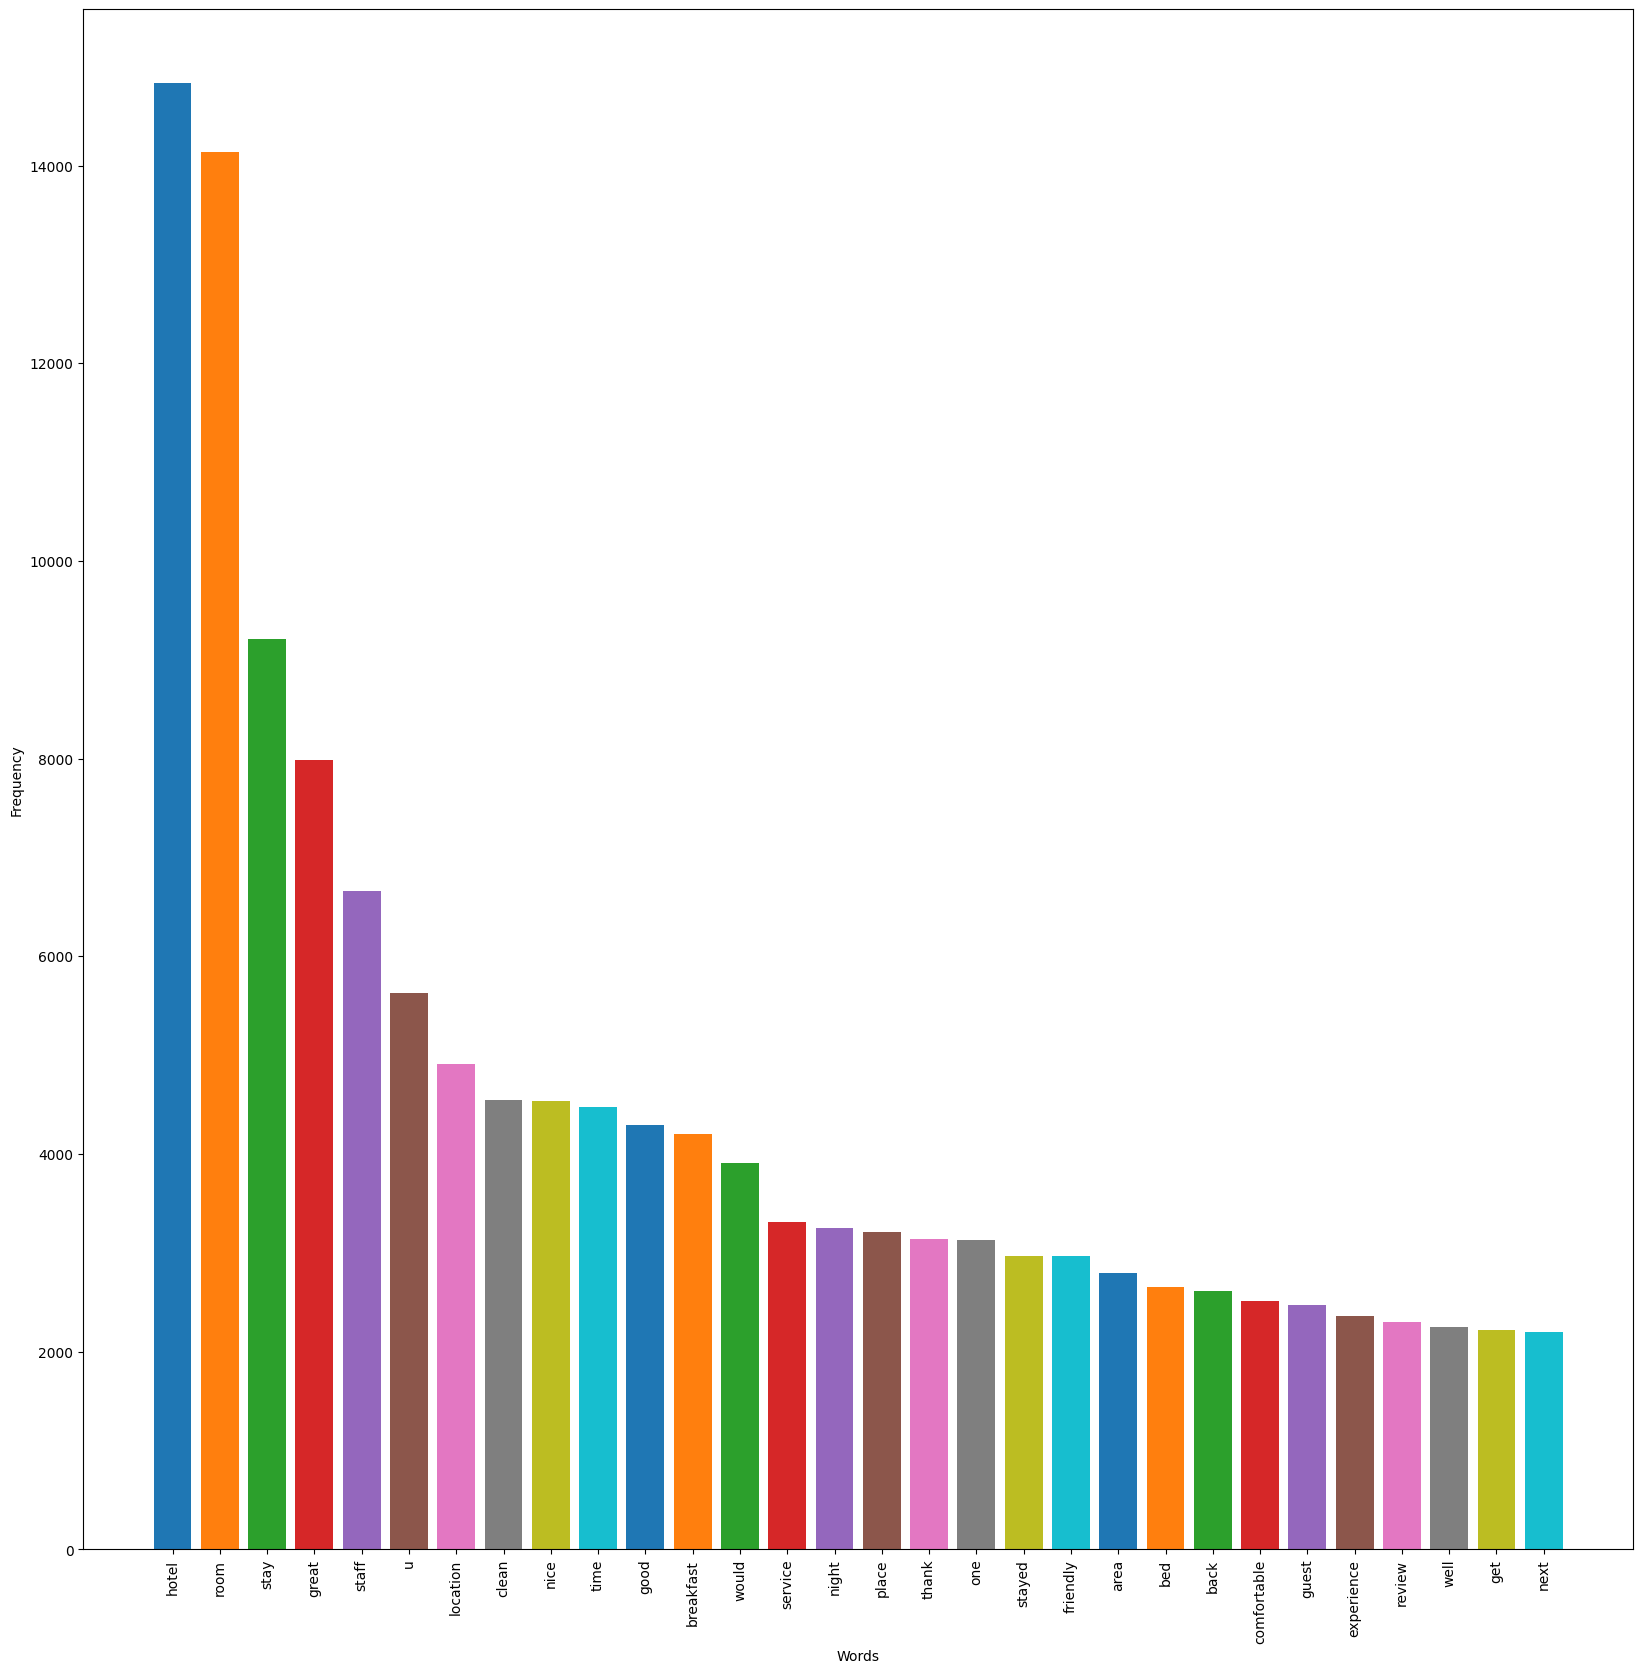

In [12]:

# Visualize the most repeated words
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)


# visualization with pyplot
plt.figure(figsize=(20,20))
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)
for word , freq in collection[:30]:
    plt.bar(word, freq)
plt.show()

# Model Building
 **Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_classifier = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {'C': [1, 10, 100]}

# Perform grid search to find the best C value
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid , cv=3)

grid_search.fit(X_train, y_train)

# Get the best C value
best_C = grid_search.best_params_['C']

# Print the best C value and the corresponding mean cross-validated score
print("Best C value:", grid_search.best_params_['C'])
print("Best score:", grid_search.best_score_)




Best C value: 10
Best score: 0.8574825089849515


In [ ]:
from sklearn.metrics import classification_report

# Train the logistic regression model with the best C value
lr_classifier = LogisticRegression(C=best_C)
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_classifier.predict(X_test)

# Evaluate the model's accuracy
print("Classification Report for Logistic Regression: \n", classification_report(y_test, y_pred))


Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           1       0.76      0.69      0.72       222
           2       0.50      0.34      0.41       246
           3       0.91      0.96      0.93      1532

    accuracy                           0.86      2000
   macro avg       0.72      0.67      0.69      2000
weighted avg       0.84      0.86      0.85      2000



# **Ensemble model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the base models
lr = LogisticRegression()
xgb = XGBClassifier()
rf = RandomForestClassifier()

# Create the stacking ensemble
stacking_model = StackingClassifier(
    estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)],
    final_estimator=LogisticRegression()
)

# Define the parameter grid for each base model
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_xgb = {'xgb__max_depth': [3, 5, 7], 'xgb__n_estimators': [100, 200, 300]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}

# Create the GridSearchCV objects for each base model
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

# Train the base models with hyperparameter tuning
grid_search_lr.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Get the best base models
best_lr = grid_search_lr.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_

# Set the best base models in the stacking ensemble
stacking_model.estimators = [('lr', best_lr), ('xgb', best_xgb), ('rf', best_rf)]

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Print the best parameters found for each base model
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Make predictions on the test set using the stacking ensemble
y_pred = stacking_model.predict(X_test)

# Inverse transform the predictions to get the original labels
y_pred_label = label_encoder.inverse_transform(y_pred)
y_test_label = label_encoder.inverse_transform(y_test)

# Evaluate the stacking ensemble
print(classification_report(y_test_label, y_pred_label))

Best parameters for Logistic Regression: {'C': 10}
Best parameters for XGBoost: {'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

    negative       0.77      0.71      0.74       222
     neutral       0.57      0.36      0.44       246
    positive       0.91      0.97      0.94      1532

    accuracy                           0.87      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.85      0.87      0.86      2000



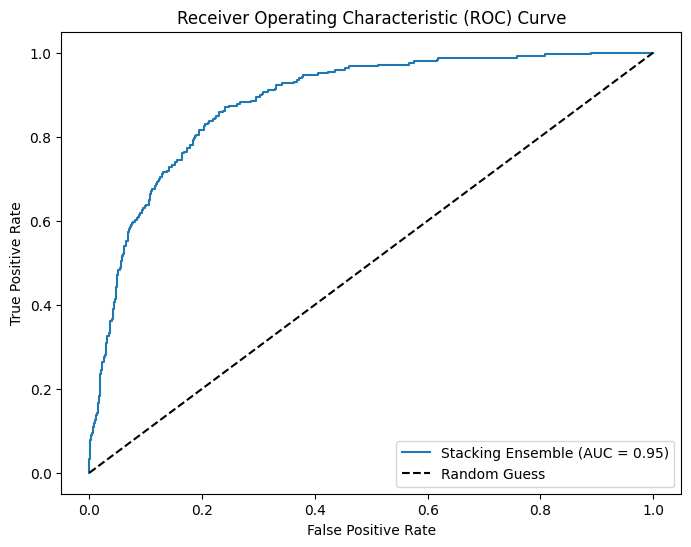

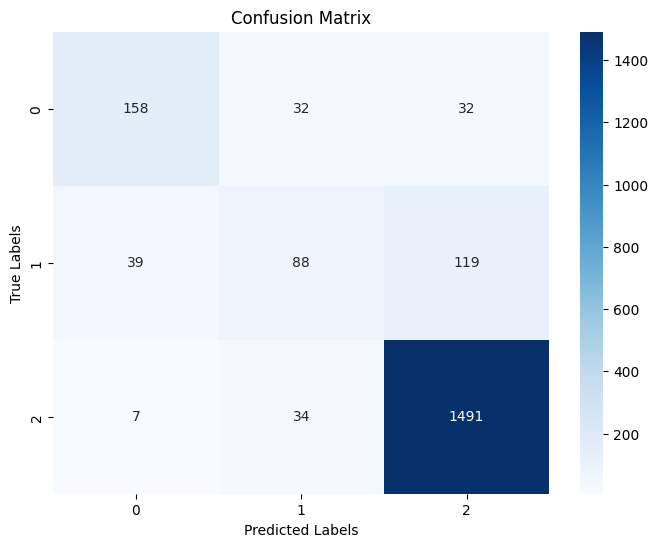

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Calculate predicted probabilities for each class
y_prob = stacking_model.predict_proba(X_test)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Stacking Ensemble (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Neural Network**

In [13]:
!pip install scikeras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

In [14]:

x = df['text']


In [ ]:
df.head()

,reviews.title,reviews.text,reviews.rating,category,text,category_encoded
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,neutral,best western plus hotel hotel nice quiet know ...,2
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,positive,clean room solid rate heart carmel stayed king...,3
2,Business,"Parking was horrible, somebody ran into my ren...",3,neutral,business parking horrible somebody ran rental ...,2
3,Very good,Not cheap but excellent location. Price is som...,5,positive,good cheap excellent location price somewhat s...,3
4,Low chance to come back here,If you get the room that they advertised on th...,2,negative,low chance come back get room advertised websi...,1


In [15]:
df["category_encoded"] = encoder.fit_transform(df["category"])
df.head()

,reviews.title,reviews.text,reviews.rating,category,text,category_encoded
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,neutral,best western plus hotel hotel nice quiet know ...,1
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,positive,clean room solid rate heart carmel stayed king...,2
2,Business,"Parking was horrible, somebody ran into my ren...",3,neutral,business parking horrible somebody ran rental ...,1
3,Very good,Not cheap but excellent location. Price is som...,5,positive,good cheap excellent location price somewhat s...,2
4,Low chance to come back here,If you get the room that they advertised on th...,2,negative,low chance come back get room advertised websi...,0


In [16]:
y = df["category_encoded"]

In [17]:
x = np.asarray(x)
y = np.asarray(y)

In [18]:
# Tokenize the text
max_words = 2000  # Consider only the top 2000 words in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)

In [19]:
# Find the maximum sequence length
maxlen = max(len(sequence) for sequence in sequences)
print(f"Maximum Sequence Length: {maxlen}")

Maximum Sequence Length: 976


In [20]:
# Pad sequences to have consistent length
padded_sequences = pad_sequences(sequences, maxlen=maxlen)
padded_sequences

array([[   0,    0,    0, ...,  893,    1,  224],
       [   0,    0,    0, ...,  133,   16,  132],
       [   0,    0,    0, ...,  433, 1738,  462],
       ...,
       [   0,    0,    0, ...,    2,    8,   24],
       [   0,    0,    0, ...,  674,  154,   17],
       [   0,    0,    0, ...,  333,  237,   70]], dtype=int32)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [22]:
#Define the plotting function

def plot_curve(epochs, hist, list_of_metrics):
   # Plot a graph of the metric vs. epochs.
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]  # Access the metric from the history object
        plt.plot(range(1, len(x) + 1), x, label=m)

    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [23]:
# Create a neural network (NN) model with a specified number of neurons in a hidden layer.
def NN_model(neurons):
    # Define a sequential model
    model = tf.keras.Sequential([
        # Embedding layer for processing sequences of integers (word indices)
        tf.keras.layers.Embedding(input_dim=max_words, output_dim=8, input_length=maxlen),
        # Flatten layer to flatten the embedded input
        tf.keras.layers.Flatten(),
        # Dense hidden layer with specified number of neurons and ReLU activation function
        tf.keras.layers.Dense(units=neurons, activation='relu'),
        # Dropout layer for regularization to prevent overfitting
        tf.keras.layers.Dropout(rate=0.5),
        # Output layer with 3 units (for 3 classes) and softmax activation for multi-class classification
        tf.keras.layers.Dense(units=3, activation='softmax')
    ])

    # Compile the model with specified optimizer, loss function, and metrics
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# Train the provided model with training data
def train_model(model):
    # Fit the model to the training data
    history = model.fit(X_train, y_train, batch_size=500, epochs=7, validation_split=0.2)

    # Extract the epoch information and training history metrics
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist


In [24]:
# hyperparameter Tunning
# Create a KerasClassifier model with a specified function to create the base model
model = KerasClassifier(model= NN_model)

# Define the grid search parameters
neurons = [16, 32, 64, 128]

# Define the parameter grid for the grid search
param_grid = dict(model__neurons=neurons)

# Perform grid search using KerasClassifier, optimizing for the specified parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize the grid search results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Extract and print mean test scores, standard deviations, and corresponding parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Retrieve the best number of neurons from the grid search results
best_neurons = grid_result.best_params_['model__neurons']


250/250 [==============================] - 7s 27ms/step - loss: 0.5297 - accuracy: 0.8085
Best: 0.842231 using {'model__neurons': 128}
0.818850 (0.021387) with: {'model__neurons': 16}
0.835604 (0.003066) with: {'model__neurons': 32}
0.841730 (0.001921) with: {'model__neurons': 64}
0.842231 (0.003876) with: {'model__neurons': 128}


Epoch 1/7
13/13 [==============================] - 2s 118ms/step - loss: 0.7703 - accuracy: 0.7290 - val_loss: 0.6853 - val_accuracy: 0.7663
Epoch 2/7
13/13 [==============================] - 1s 88ms/step - loss: 0.6590 - accuracy: 0.7706 - val_loss: 0.5886 - val_accuracy: 0.7669
Epoch 3/7
13/13 [==============================] - 2s 137ms/step - loss: 0.5140 - accuracy: 0.7809 - val_loss: 0.4678 - val_accuracy: 0.8188
Epoch 4/7
13/13 [==============================] - 2s 145ms/step - loss: 0.4052 - accuracy: 0.8420 - val_loss: 0.4198 - val_accuracy: 0.8344
Epoch 5/7
13/13 [==============================] - 2s 159ms/step - loss: 0.3377 - accuracy: 0.8625 - val_loss: 0.4060 - val_accuracy: 0.8481
Epoch 6/7
13/13 [==============================] - 2s 157ms/step - loss: 0.2903 - accuracy: 0.8848 - val_loss: 0.4119 - val_accuracy: 0.8519
Epoch 7/7
13/13 [==============================] - 1s 114ms/step - loss: 0.2397 - accuracy: 0.9109 - val_loss: 0.4171 - val_accuracy: 0.8462


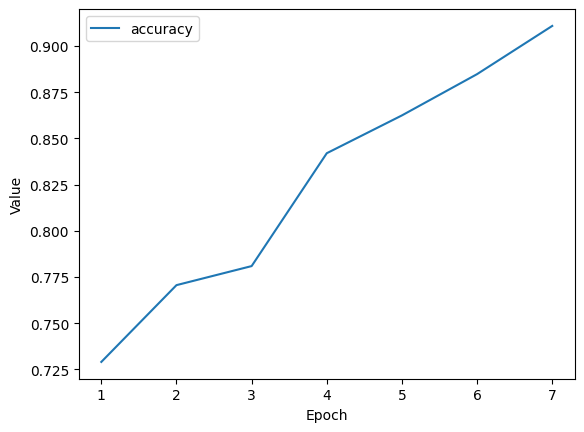

In [25]:
# Create the model.
my_model = NN_model(best_neurons)

# Train the model on the training set.
epochs, hist = train_model(my_model)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

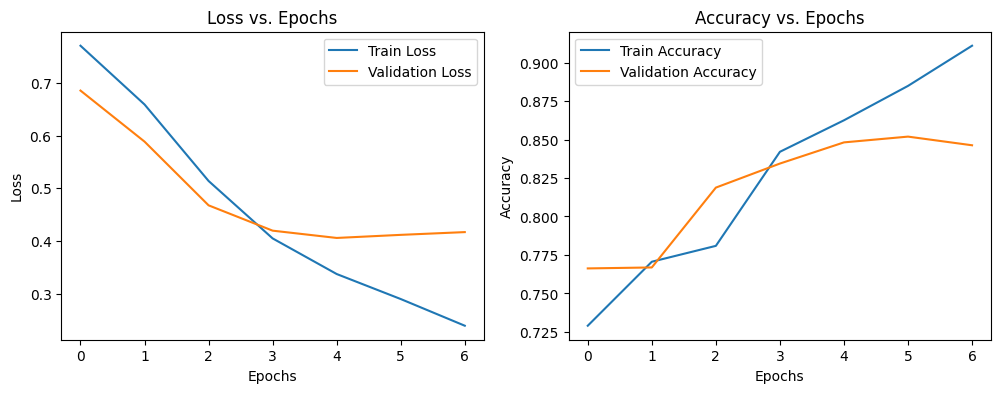

In [26]:
# Plotting the loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist['loss'], label='Train Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(hist['accuracy'], label='Train Accuracy')
plt.plot(hist['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=X_test, y=y_test, batch_size=500)


 Evaluate the new model against the test set:
4/4 [==============================] - 0s 27ms/step - loss: 0.4233 - accuracy: 0.8370


[0.4232626259326935, 0.8370000123977661]

63/63 [==============================] - 1s 7ms/step


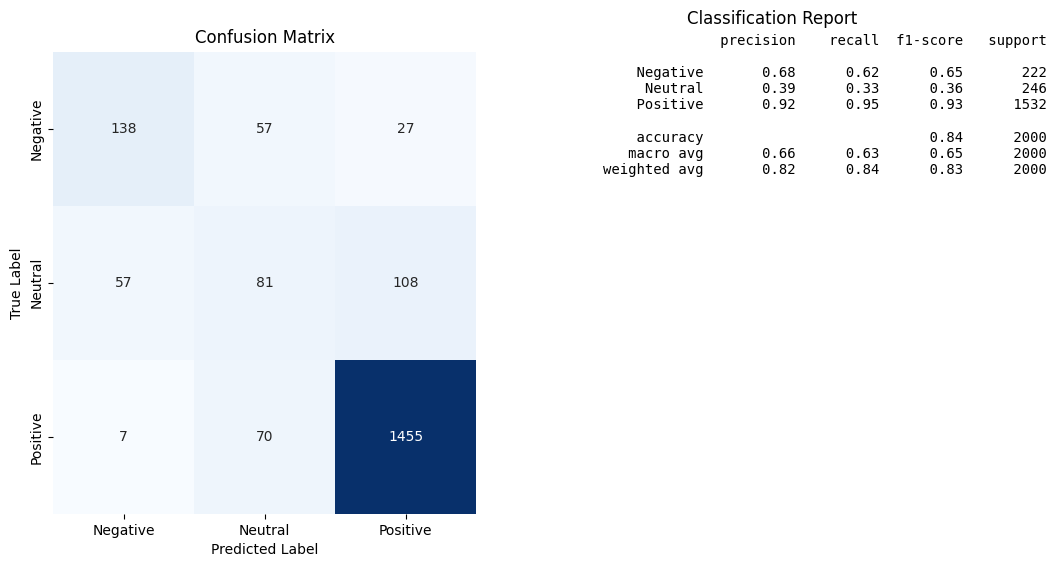

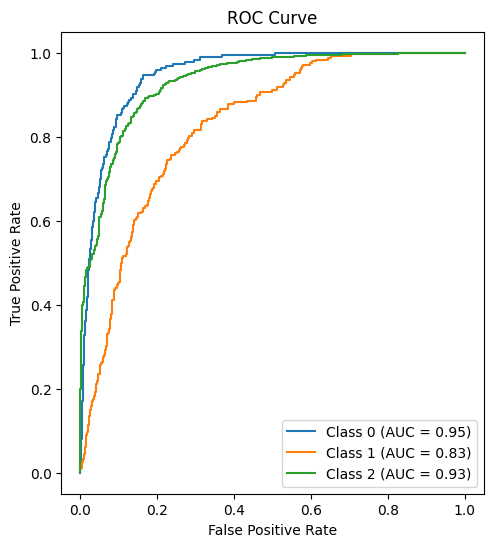

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc,  confusion_matrix

# Confusion Matrix
y_pred_prob = my_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=["Negative", "Positive", "Neutral"])

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # 3 classes
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plptting

# Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Classification Report
plt.subplot(1, 2, 2)
classification_rep = classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"])
plt.text(0.1, 0.7, classification_rep, {'fontsize': 10}, fontfamily='monospace')
plt.title('Classification Report', pad=20)
plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
# ROC Curve
plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
